Autores:  Jefferson Rhudson Pereira da Silva,
Joaliton Luan Pereira Ferreira e
Vitor Henrique Coelho Bezerra 

# Extração dos Dados

Nessa seção, utilizando a API do spotify através da biblioteca *Spotipy*, vamos extrair os dados de 10.000 artistas de 2018 disponíveis. Usando os dados desses artistas, vamos relacioná-los com outros artistas através das músicas que produziram juntos (feats). 

**ps: os passos de extração dos dados via a API pode demorar um pouco (questão de algumas horas), visto que estamos trabalhando com uma grande quantidade de dados e que várias requisições em sequencia vão ser penalizadas com um tempo de espera de 1-6 segundos.**

In [19]:
#instalando e importando o módulo para acessar a API do spotify
!pip install spotipy
import spotipy 
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

In [0]:
#configurando o acesso a API usando as credenciais do usuário
cid ="YOUR CREDENTIALS" 
secret = "YOUR CREDENTIALS" 

In [0]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [0]:
#extraindo os dados de 10000 artistas de 2018
import time
artistas = []
for i in range(0,10000,50): 
  results = sp.search(q='year:2018', type='artist', limit=50,offset=i)
  for artist in results['artists']['items']:
    artistas.append(artist)
  #faz as requisições serem um pouco mais lentas para evitar um rápido alcance do limite máximo de requisições  
  time.sleep(0.002)

In [0]:
#para cada artista, vamos extrair os seus albums e armazenar em um dicionario, onde seu nome é a chave
#um contador foi incluido para saber o progresso atual
artistas_albums = dict()
i = 0
for artista in artistas:
  albums_id = []
  albums_name = []
  #os albums que são literalmente albums
  albums = sp.artist_albums(artista['id'], limit = 50, album_type = 'album', offset = 0)['items']
  #os albums que são apenas single e adiciona ao restante dos albums
  for album in sp.artist_albums(artista['id'], limit = 50, album_type = 'single', offset = 0)['items']:
    albums.append(album)
  for album in albums:
    #evita a duplicidade de albums para diminuir o número de requisições no passo adiante
    if (album['name'] not in albums_name):
      albums_id.append(album['id'])
      albums_name.append(album['name'])
  artistas_albums[artista['name']] = albums_id
  i += 1
  print (i)

In [0]:
#para cada artista, para cada album daquele artista, pega as músicas do album e o nome dos artistas da música
relacionamentos = []
i = 0
for artista, albums in artistas_albums.items():
  feats = []
  for album in albums:
    for song in sp.album_tracks(album, limit = 50)['items']:
      #se existe pelo menos 2 pessoas como artistas de uma música
      if (len(song['artists']) > 1):
        for feat in song['artists']:
          #se o artista é diferente do artista atual, adicione como um feat
          if (feat['name'] != artista):
            feats.append(feat['name'])
    #apenas para diminuir a velocidade das requisições        
    time.sleep(0.001)
    #para cada artista que se relacionou com o artista atual, adicione na lista de relacionamentos o artista atual e o artista que foi relacionado com
  for feat in feats:
    relacionamentos.append((artista, feat))
  #contador apenas para exibir o progresso atual  
  print(i)  
  i += 1

In [0]:
#visto que o tempo de espera para os passos acima não é tão curto, vamos armazenar os dados extraídos em um arquivo txt separado por tabulação

#remove os duplicados
dados = list(dict.fromkeys(relacionamentos))
with open("spotify_artistas_feats.txt", 'w', encoding = "utf-8") as file:
  file.write("FROM\tTO\n")
  for relacionamento in dados:
    file.write(relacionamento[0] + '\t' + relacionamento[1] + '\n')
from google.colab import files
files.download("spotify_artistas_feats.txt")


# Análise da Rede

Nesta seção utilizamos os dados salvos da api do Spotify e, com intuito de melhorar a visualização, modificados pelo Gephi . Nela, analisamos tanto se os artistas que mais possuem participações em suas músicas necessariamente são populares e possuem, se os artistas que menos possuem participações necessáriamente tem pouca popularidade e poucos seguidores. Na seção analisamos também se a teorida dos seus graus de separação (<https://muralcientifico.com/2017/09/03/entenda-a-teoria-dos-seis-graus-de-separacao/>) se aplica na relação de participações de artistas em músicas.


In [0]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

caminho_graphml = "files/grafo-artistas.graphml"

In [0]:
g = nx.read_graphml(caminho_graphml)

In [0]:
pos = {node: [g.nodes[node]['x'], g.nodes[node]['y']] for node in g}

In [0]:
labels = {node: g.nodes[node]['label'] for node in g}

In [0]:
node_size = [g.nodes[node]["size"]*10 for node in g]

In [0]:
from matplotlib.colors import rgb2hex
node_color = [rgb2hex((g.nodes[node]['r']/255,
               g.nodes[node]['g']/255,
               g.nodes[node]['b']/255)) for node in g]

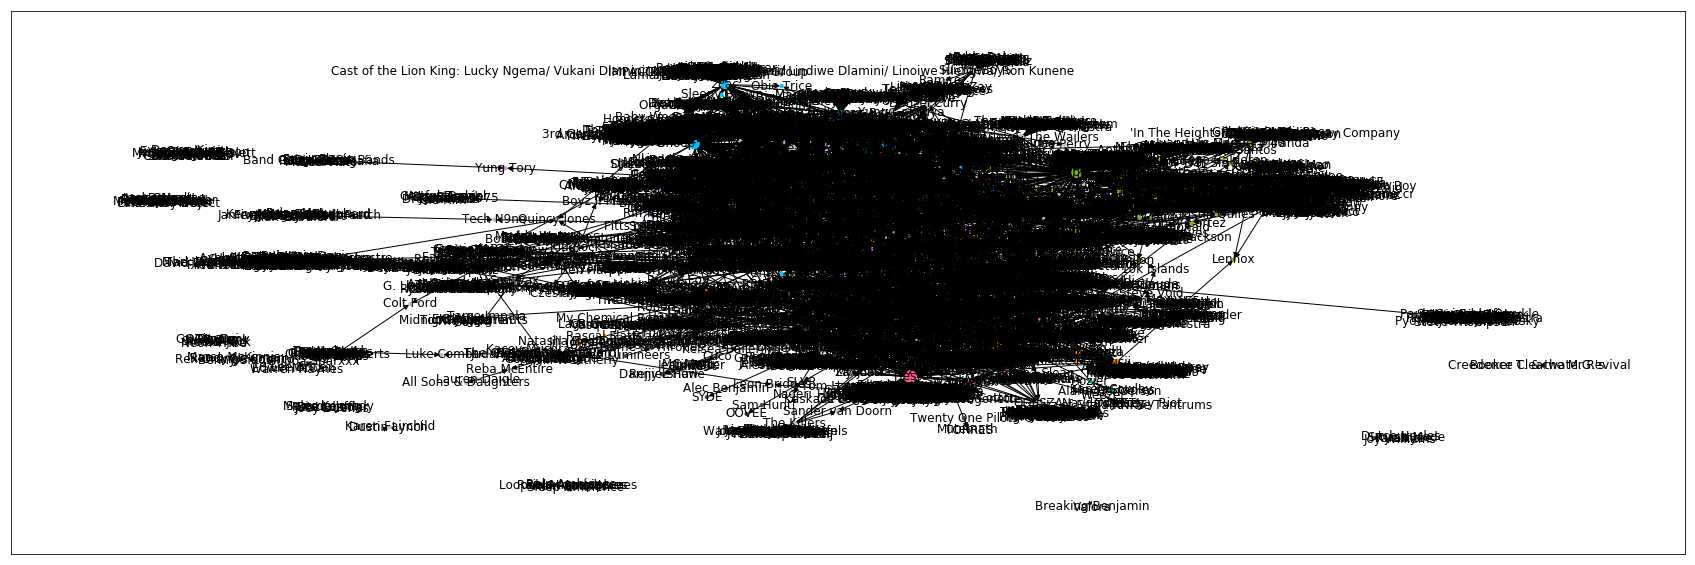

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,10))
nx.draw_networkx(g,pos=pos,labels=labels,node_size=node_size,node_color=node_color,ax=ax)

In [0]:
g.edges('Billie Eilish', data=True)

OutEdgeDataView([('Billie Eilish', 'Khalid', {'weight': 1.0, 'id': '49964'}), ('Billie Eilish', 'TroyBoi', {'weight': 1.0, 'id': '49965'}), ('Billie Eilish', 'Sofi Tukker', {'weight': 1.0, 'id': '49966'}), ('Billie Eilish', 'Vince Staples', {'weight': 1.0, 'id': '49967'}), ('Billie Eilish', 'Marian Hill', {'weight': 1.0, 'id': '49968'}), ('Billie Eilish', 'BLU J', {'weight': 1.0, 'id': '49969'}), ('Billie Eilish', 'Gazzo', {'weight': 1.0, 'id': '49970'}), ('Billie Eilish', 'Jerry Folk', {'weight': 1.0, 'id': '49971'}), ('Billie Eilish', 'Aire Atlantica', {'weight': 1.0, 'id': '49972'}), ('Billie Eilish', 'Astronomyy', {'weight': 1.0, 'id': '49973'}), ('Billie Eilish', 'blackbear', {'weight': 1.0, 'id': '49974'}), ('Billie Eilish', 'GOLDHOUSE', {'weight': 1.0, 'id': '49975'}), ('Billie Eilish', 'Cautious Clay', {'weight': 1.0, 'id': '49976'})])

In [0]:
number_edges = { node: len(g.edges(node, data=True)) for node in g}

In [11]:
from collections import Counter 
k = Counter(number_edges)
most_common = k.most_common()
less_common = most_common[::-1]
print("5 Most common: {}\n5 less common: {}".format(most_common[0:5],less_common[0:5]))

5 Most common: [('Tiësto', 314), ('Snoop Dogg', 215), ('Pitbull', 205), ('David Guetta', 161), ('Yo Gotti', 130)]
5 less common: [('Apres', 0), ('Nick Martin', 0), ('Outrovert', 0), ('TREGS', 0), ('Deniz Koyu', 0)]


In [0]:
five_most_artists_info = []

In [0]:
#para cada artista que possue a maior quantidade de feats eu pego respectivamente: nome,popularidade e número de seguidores
for artist in most_common[0:5]:
  name = artist[0]
  artist_info = sp.search(type="artist",q=name)['artists']
  popularity = artist_info['items'][0]['popularity']
  followers = artist_info['items'][0]['followers']['total']
  five_most_artists_info.append((name,popularity,followers))
  

In [14]:
five_most_artists_info

[('Tiësto', 85, 4420624),
 ('Snoop Dogg', 87, 4735016),
 ('Pitbull', 86, 7005141),
 ('David Guetta', 91, 19016743),
 ('Yo Gotti', 78, 2423970)]

In [0]:
five_less_artists_info = []

In [0]:
#para cada artista que possue a menor quantidade de feats eu pego respectivamente: nome,popularidade e número de seguidores
for artist in less_common[0:5]:
  name = artist[0]
  artist_info = sp.search(type="artist",q=name)['artists']
  popularity = artist_info['items'][0]['popularity']
  followers = artist_info['items'][0]['followers']['total']
  five_less_artists_info.append((name,popularity,followers))
  

In [17]:
five_less_artists_info

[('Apres', 41, 2040),
 ('Nick Martin', 46, 7227),
 ('Outrovert', 15, 179),
 ('TREGS', 35, 4545),
 ('Deniz Koyu', 62, 70026)]

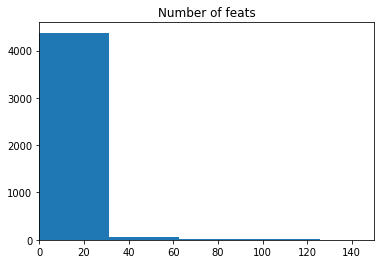

In [18]:
import numpy as np
import matplotlib.pyplot as plt

relations = []
for node in g:
  relations.append(len(g.edges(node, data=True)))

plt.hist(relations)
plt.title("Number of feats")
plt.xlim(0,150)
plt.show()

In [0]:
# É possível chegar de um artista A até um artista B com apenas 6 arestas?
caminhos_maioresq6 = []
for node1 in g.nodes():
    for node2 in g.nodes():
    try:
        if (len(nx.shortest_path(g, node1, node2)) > 7):
        caminhos_maioresq6.append((node1, node2))
    except:
        pass
if (len(caminhos_maioresq6) == 0):
    print("Teoria dos seis graus de separação é verdade")
else:
    print("Teoria dos seis graus de separação não se aplica a este conjunto de dados")

Teoria dos seis graus de separação não se aplica a este conjunto de dados
